In [64]:
import sys
import os
import numpy as np
import pandas as pd

PROJ_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJ_ROOT not in sys.path:
    sys.path.insert(0, PROJ_ROOT)

from src.models.random_forest import RandomForestModel
from src.dataset import Dataset
from src.utils import ModelIO

pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)

In [65]:
dataset = Dataset()
f_train, f_test, l_train, l_test = dataset.split_data(target_column = 'LUNG_CANCER')

In [66]:
model = RandomForestModel(n_trees = 200)
model.train(f_train, l_train)

In [67]:
print("=============== TRAINING SET ===============")
model.score(f_train, l_train)

=============== TRAINING SET ===============

Confusion Matrix:
Predicted   0    1
Actual            
0          25    1
1           1  193

TN=25, FP=1, FN=1, TP=193

Accuracy : 0.9909
Recall   : 0.9948   (TP/(TP+FN))
Precision: 0.9948   (TP/(TP+FP))
F1-score : 0.9948   (2*P*R/(P+R))
AUC      : 0.9986


In [68]:
print("=============== TESTING SET ===============")
model.score(f_test, l_test)

=============== TESTING SET ===============

Confusion Matrix:
Predicted  0   1
Actual          
0          6   6
1          0  44

TN=6, FP=6, FN=0, TP=44

Accuracy : 0.8929
Recall   : 1.0000   (TP/(TP+FN))
Precision: 0.8800   (TP/(TP+FP))
F1-score : 0.9362   (2*P*R/(P+R))
AUC      : 0.9830


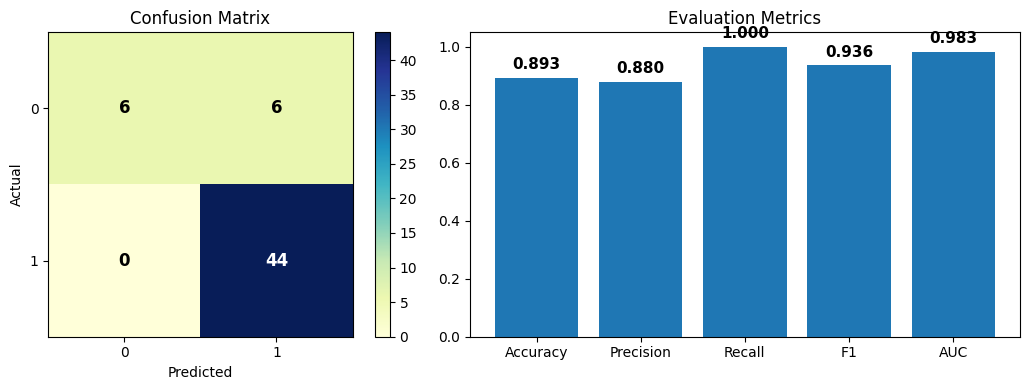

In [69]:
model.plot_evaluation()

In [70]:
ModelIO.save(model, "random_forest_model.pkl")

Model saved to: d:\GitHub Clone\lung_cancer_RF\checkpoints\random_forest_model.pkl


True